In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [92]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [93]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [94]:
df.shape

(7752, 25)

In [95]:
df.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [96]:
df['station'].nunique()

25

In [97]:
df['station'].value_counts()

1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64

In [98]:
df.dropna(subset=['station'],inplace=True)

In [99]:
df['station'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.])

In [100]:
df['Date'].value_counts()

30-06-2013    25
18-07-2016    25
25-07-2016    25
24-07-2016    25
23-07-2016    25
              ..
09-08-2014    25
08-08-2014    25
07-08-2014    25
06-08-2014    25
30-08-2017    25
Name: Date, Length: 310, dtype: int64

In [101]:
df['Date'].nunique()

310

In [102]:
# date column datatype is object change to date format
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7750 entries, 0 to 7749
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7750 non-null   float64       
 1   Date              7750 non-null   datetime64[ns]
 2   Present_Tmax      7680 non-null   float64       
 3   Present_Tmin      7680 non-null   float64       
 4   LDAPS_RHmin       7675 non-null   float64       
 5   LDAPS_RHmax       7675 non-null   float64       
 6   LDAPS_Tmax_lapse  7675 non-null   float64       
 7   LDAPS_Tmin_lapse  7675 non-null   float64       
 8   LDAPS_WS          7675 non-null   float64       
 9   LDAPS_LH          7675 non-null   float64       
 10  LDAPS_CC1         7675 non-null   float64       
 11  LDAPS_CC2         7675 non-null   float64       
 12  LDAPS_CC3         7675 non-null   float64       
 13  LDAPS_CC4         7675 non-null   float64       
 14  LDAPS_PPT1        7675 n

In [104]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6,30
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6,30
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6,30
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6,30
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6,30


In [105]:
df.isna().sum()

station              0
Date                 0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Month                0
Day                  0
dtype: int64

In [106]:
df['Present_Tmax']=df['Present_Tmax'].fillna(df['Present_Tmax'].mean())

In [107]:
df['Present_Tmin']=df['Present_Tmin'].fillna(df['Present_Tmin'].mean())
df['LDAPS_RHmin']=df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean())
df['LDAPS_RHmax']=df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean())
df['LDAPS_Tmax_lapse']=df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean())
df['LDAPS_Tmin_lapse']=df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean())
df['LDAPS_WS']=df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean())
df['LDAPS_LH']=df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean())
df['LDAPS_CC1']=df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean())
df['LDAPS_CC2']=df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean())
df['LDAPS_CC3']=df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean())
df['LDAPS_CC4']=df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean())
df['LDAPS_PPT1']=df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean())
df['LDAPS_PPT2']=df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean())
df['LDAPS_PPT3']=df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean())
df['LDAPS_PPT4']=df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean())
df['Next_Tmax']=df['Next_Tmax'].fillna(df['Next_Tmax'].mean())
df['Next_Tmin']=df['Next_Tmin'].fillna(df['Next_Tmin'].mean())

In [108]:
df.isna().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Month               0
Day                 0
dtype: int64

In [109]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Month',
       'Day'],
      dtype='object')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7750 entries, 0 to 7749
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7750 non-null   float64       
 1   Date              7750 non-null   datetime64[ns]
 2   Present_Tmax      7750 non-null   float64       
 3   Present_Tmin      7750 non-null   float64       
 4   LDAPS_RHmin       7750 non-null   float64       
 5   LDAPS_RHmax       7750 non-null   float64       
 6   LDAPS_Tmax_lapse  7750 non-null   float64       
 7   LDAPS_Tmin_lapse  7750 non-null   float64       
 8   LDAPS_WS          7750 non-null   float64       
 9   LDAPS_LH          7750 non-null   float64       
 10  LDAPS_CC1         7750 non-null   float64       
 11  LDAPS_CC2         7750 non-null   float64       
 12  LDAPS_CC3         7750 non-null   float64       
 13  LDAPS_CC4         7750 non-null   float64       
 14  LDAPS_PPT1        7750 n

In [111]:
df.nunique()

station               25
Date                 310
Present_Tmax         168
Present_Tmin         156
LDAPS_RHmin         7673
LDAPS_RHmax         7665
LDAPS_Tmax_lapse    7676
LDAPS_Tmin_lapse    7676
LDAPS_WS            7676
LDAPS_LH            7676
LDAPS_CC1           7570
LDAPS_CC2           7583
LDAPS_CC3           7600
LDAPS_CC4           7525
LDAPS_PPT1          2813
LDAPS_PPT2          2511
LDAPS_PPT3          2357
LDAPS_PPT4          1919
lat                   12
lon                   25
DEM                   25
Slope                 25
Solar radiation     1575
Next_Tmax            184
Next_Tmin            158
Month                 12
Day                   21
dtype: int64

In [112]:
# value counts in each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64


2013-06-30    25
2016-07-18    25
2016-07-25    25
2016-07-24    25
2016-07-23    25
              ..
2014-09-08    25
2014-08-08    25
2014-07-08    25
2014-06-08    25
2017-08-30    25
Name: Date, Length: 310, dtype: int64


31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
21.2      1
20.1      1
36.4      1
20.3      1
20.0      1
Name: Present_Tmax, Length: 168, dtype: int64


24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
29.7      1
29.6      1
14.3      1
29.9      1
15.0      1
Name: Present_Tmin, Length: 156, dtype: int64


56.758747    75
71.658089     2
77.030350     2
51.810596     2
39.882526     1
   

In [113]:
df.drop_duplicates(inplace=True)

In [114]:
df.duplicated().sum()

0

In [115]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day
count,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,...,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000
mean,13.000000,29.768464,23.225742,56.758747,88.377125,29.613845,23.512997,7.096501,62.495273,0.368744,...,0.267307,37.544720,126.991400,61.854944,1.256692,5341.549330,30.275437,22.932837,7.080645,16.370968
std,7.211568,2.953516,2.398327,14.585101,7.149011,2.928357,2.330881,2.166519,33.516382,0.261096,...,1.185994,0.050335,0.079406,54.256953,1.369833,428.996445,3.117994,2.478851,2.238364,8.241331
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,37.456200,126.826000,12.370000,0.098500,4329.520508,17.400000,11.300000,1.000000,7.000000
25%,7.000000,27.800000,21.700000,46.048225,84.318649,27.693733,22.115268,5.686498,37.547426,0.148339,...,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000,7.000000,8.000000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,...,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,7.000000,16.000000
75%,19.000000,32.000000,24.875000,67.032715,93.703491,31.682567,25.133460,8.005363,83.891182,0.571665,...,0.000686,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,8.000000,24.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,16.655469,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000,12.000000,31.000000


In [ ]:
# data analysis we can see that no invalid no or negative  value present
# each column count is same there is no missing value
# target variable is contineous data so its regression problem 
# duplicates row removed
# each column datatype is correct according to the data present in each column
#

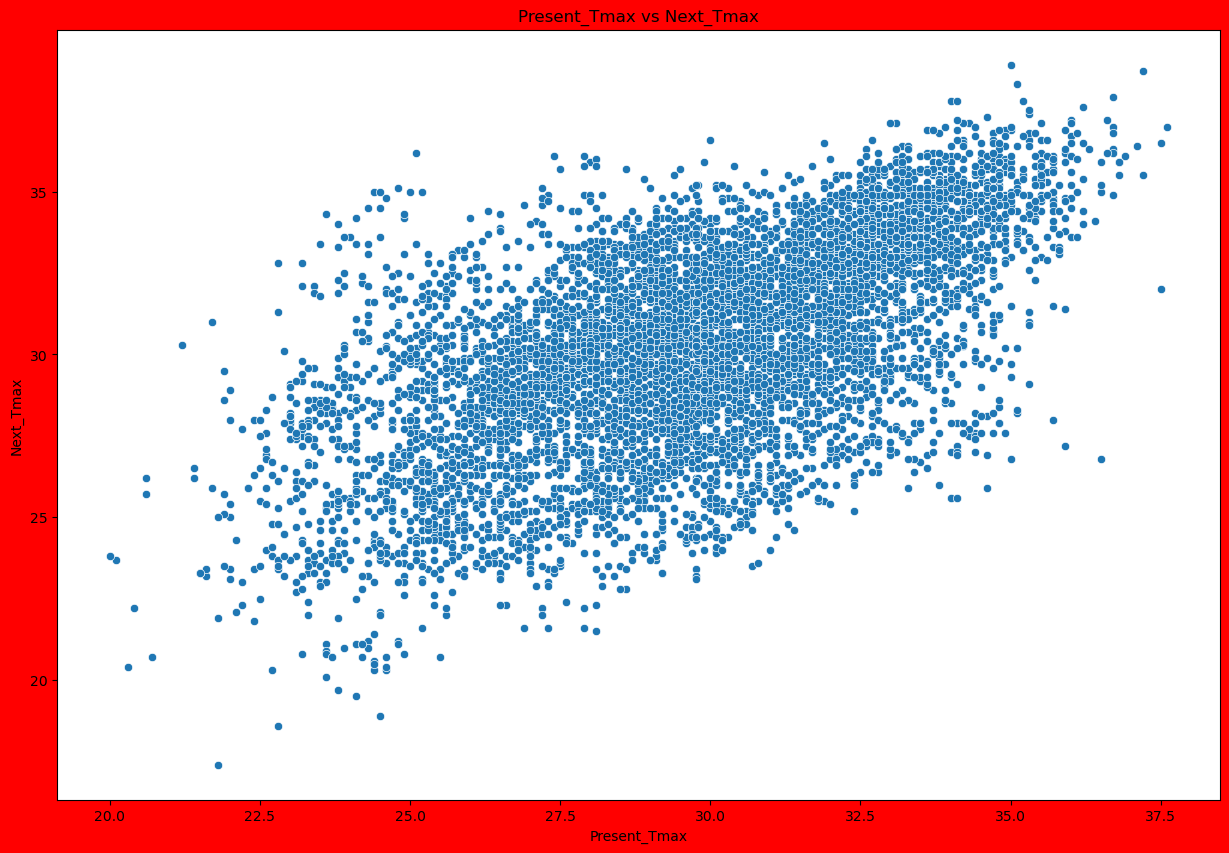

In [33]:
# visualise the data
# check any relationship between present and next Tmax
plt.figure(figsize=(15,10),facecolor='r')
sns.scatterplot(x=df['Present_Tmax'],y=df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')
plt.title('Present_Tmax vs Next_Tmax')
plt.show()

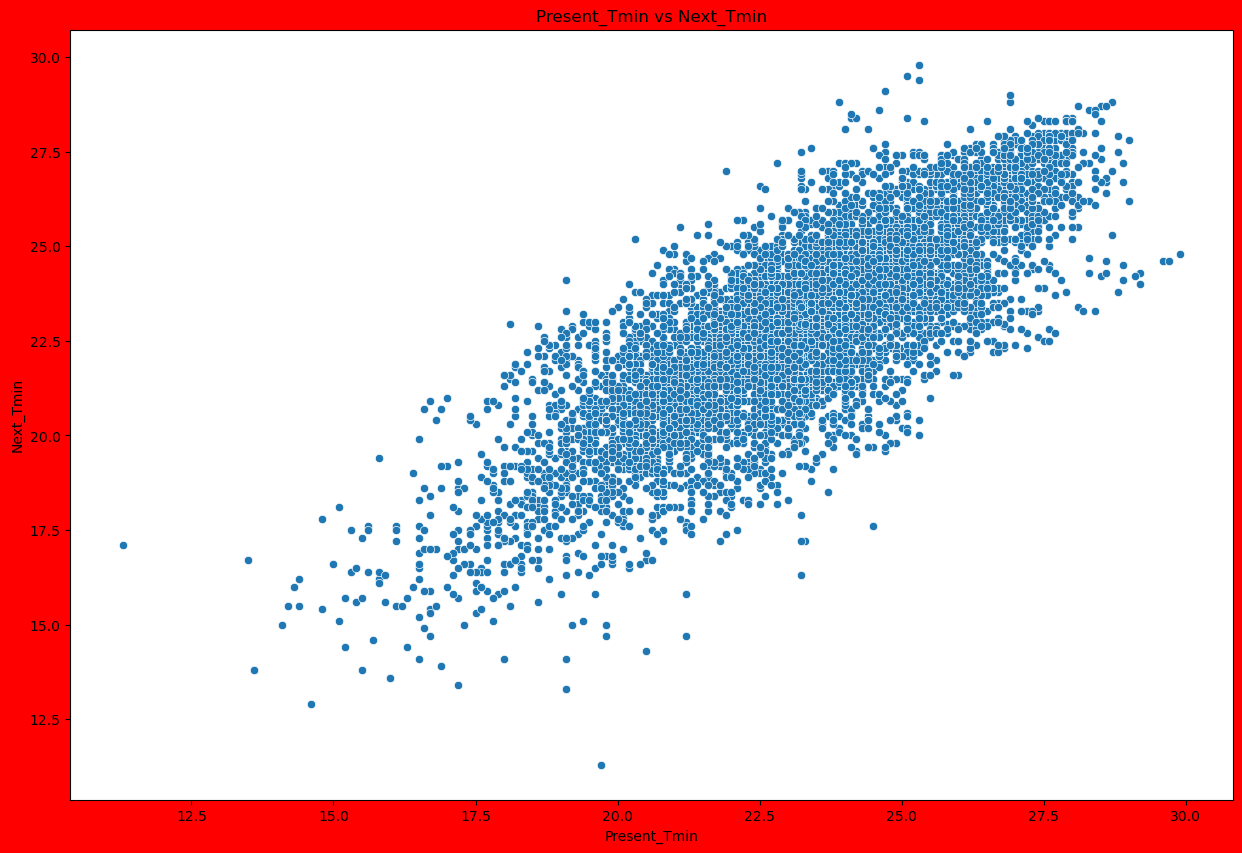

In [34]:
# we can see that there is a positive corelation between present and next TMax
# we will check present and next Tmin
plt.figure(figsize=(15,10),facecolor='r')
sns.scatterplot(x=df['Present_Tmin'],y=df['Next_Tmin'])
plt.xlabel('Present_Tmin')
plt.ylabel('Next_Tmin')
plt.title('Present_Tmin vs Next_Tmin')
plt.show()

In [ ]:
# we can see that there is a positive corelation between present and next TMin

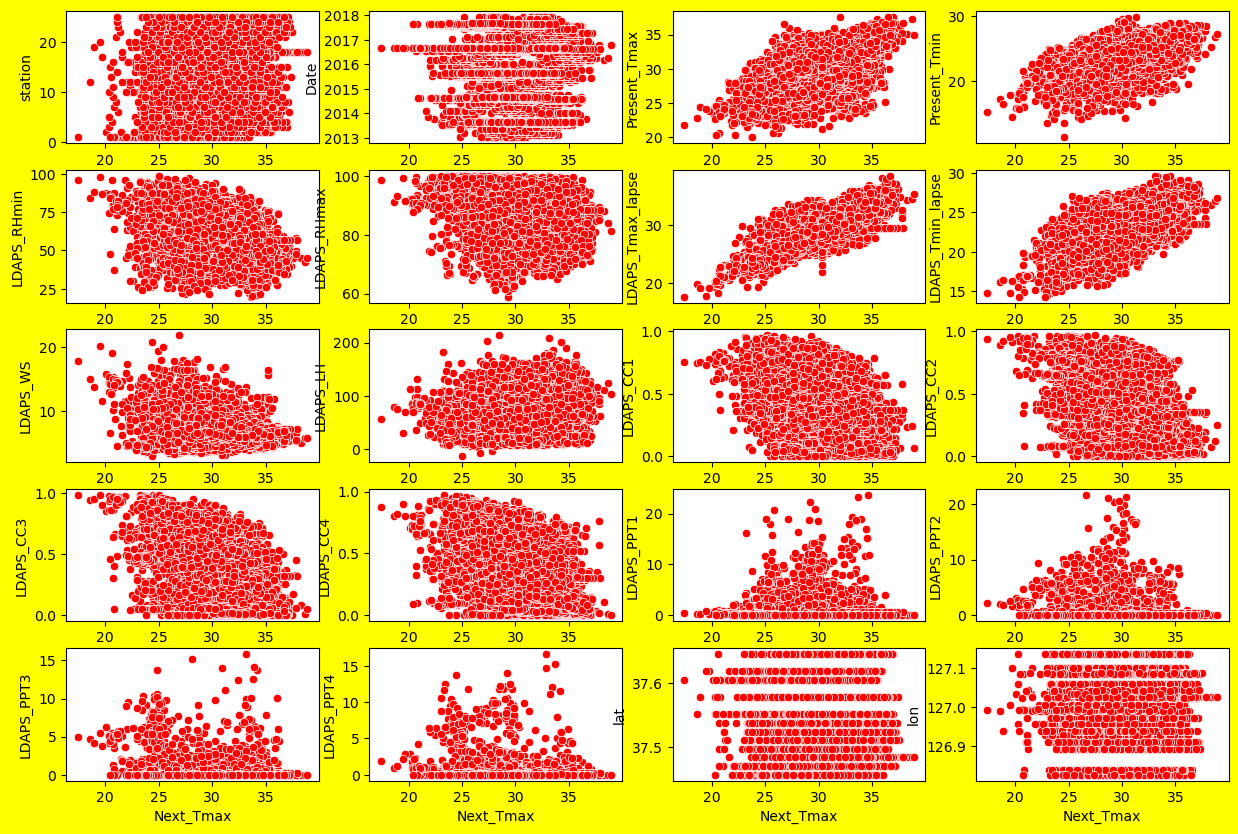

In [35]:
# plot scatter plot to check relation between target and features
plt.figure(figsize=(15,10),facecolor='yellow')
p=1
for i in df:
    if p<=20:
        plt.subplot(5,4,p)
        sns.scatterplot(x='Next_Tmax',y=i,data=df,color='red')
        plt.xlabel('Next_Tmax')
        plt.ylabel(i)
    p+=1
plt.show()

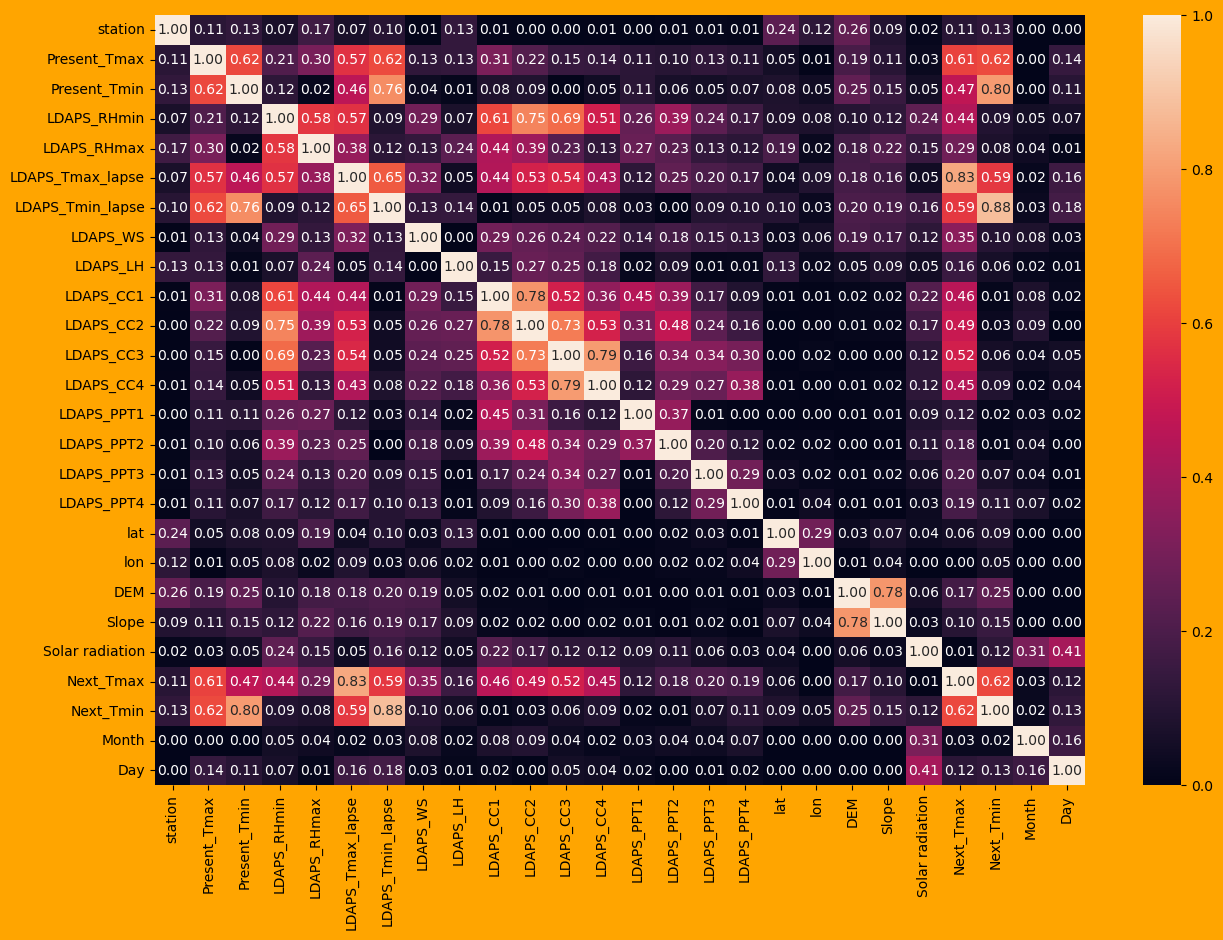

In [82]:
# use heatmap to check feature and target relationship 
df_corr=df.corr().abs()
plt.figure(figsize=(15,10),facecolor='orange')
sns.heatmap(df_corr,annot=True,fmt='0.2f',linecolor='black')
plt.show()

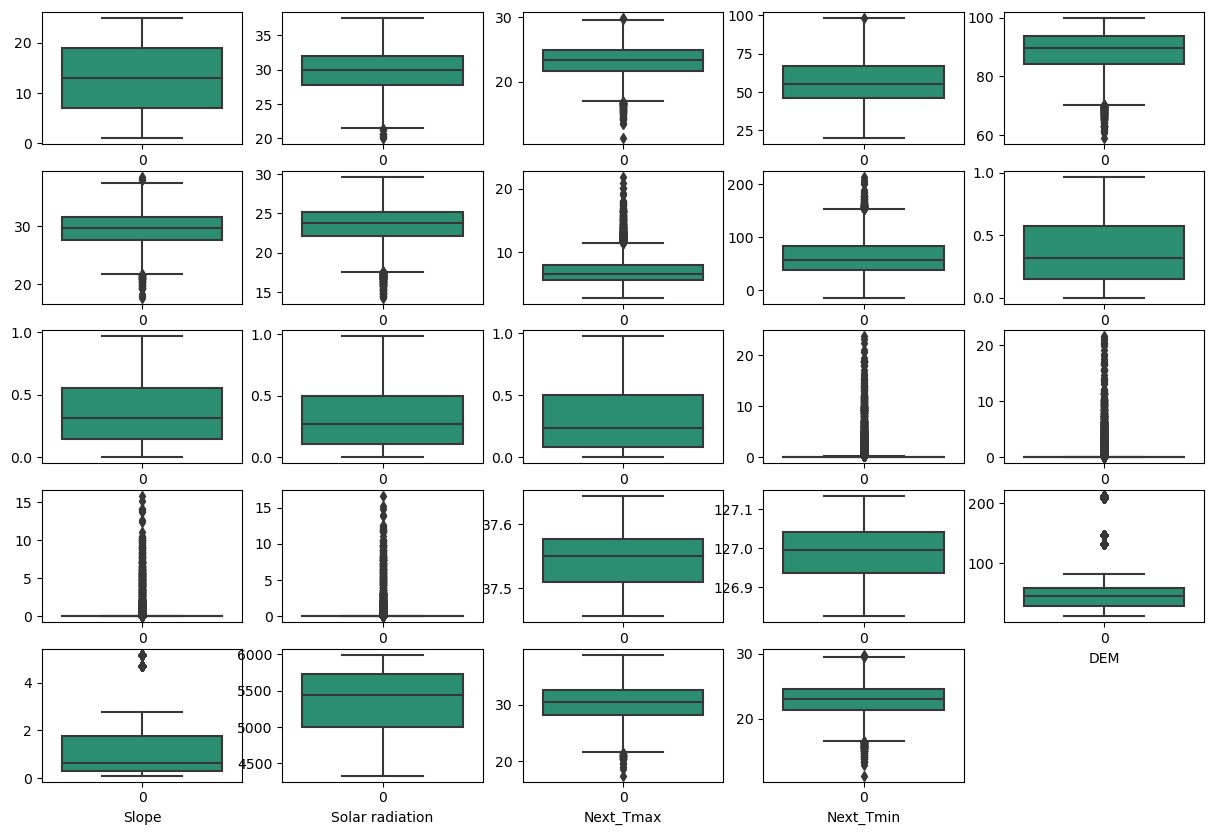

In [116]:
# check outliers using boxplot
plt.figure(figsize=(15,10),facecolor='white')
p=1
for i in df[['station','Present_Tmax','Present_Tmin','LDAPS_RHmin',
       'LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS',
       'LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4',
       'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','lat', 'lon',
       'DEM','Slope','Solar radiation','Next_Tmax','Next_Tmin']]:
    if p<=25:
        plt.subplot(5,5,p)
        sns.boxplot(df[i],palette='Dark2')
        plt.xlabel(i)
    p+=1
plt.show()
    

In [117]:
df.isna().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Month               0
Day                 0
dtype: int64

In [118]:
df.drop('Date',axis=1,inplace=True)

In [119]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6,30
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6,30
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6,30
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6,30


In [57]:
df.columns

AttributeError: 'NoneType' object has no attribute 'columns'

In [120]:
from numpy import percentile
columns=df.columns
for i in columns:
    if isinstance(df[i][0],str):
        continue
    else:
        quartiles=percentile(df[i],[25,75])
        lower_level=quartiles[0]-(1.5*(quartiles[1]-quartiles[0]))
        upper_level=quartiles[1]+(1.5*(quartiles[1]-quartiles[0]))
        df[i]=df[i].apply(lambda x: upper_level if x>upper_level else (lower_level if x < lower_level else x))

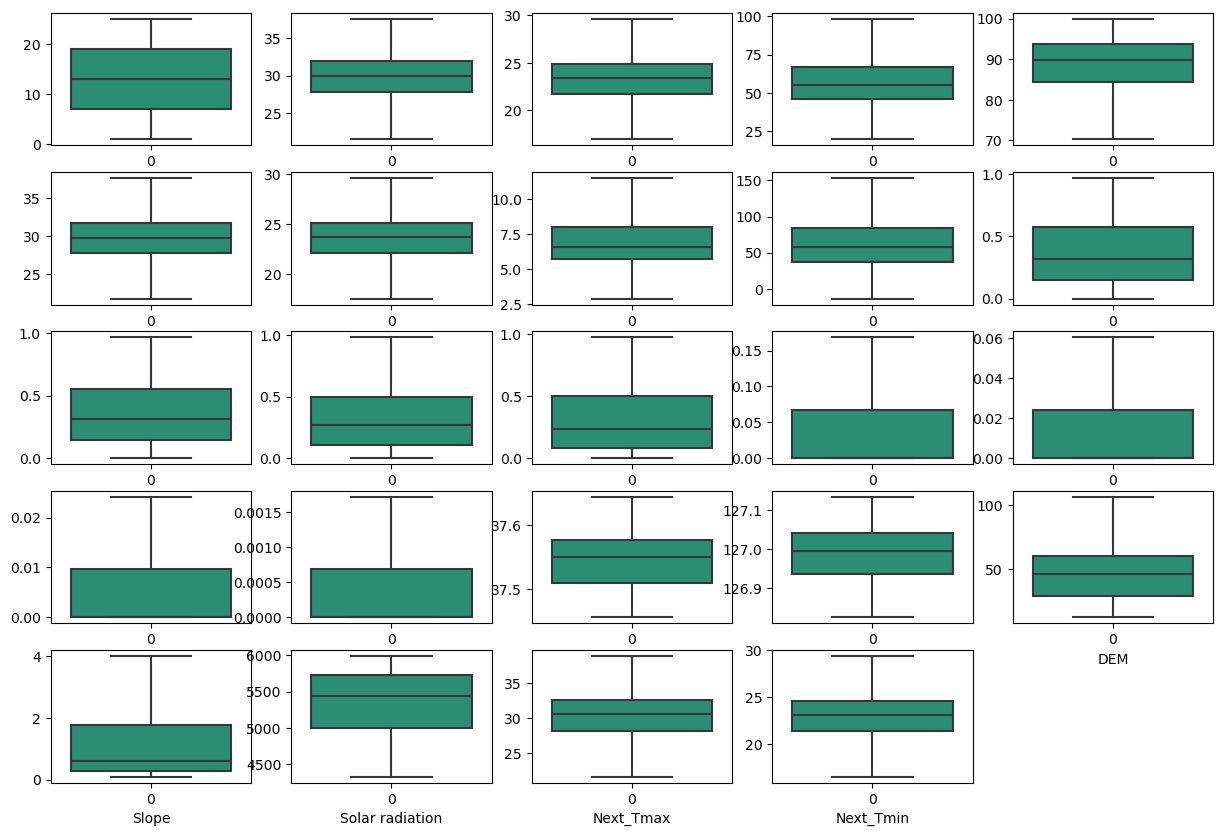

In [121]:
# check outliers using boxplot
plt.figure(figsize=(15,10),facecolor='white')
p=1
for i in df[['station','Present_Tmax','Present_Tmin','LDAPS_RHmin',
       'LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS',
       'LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4',
       'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','lat', 'lon',
       'DEM','Slope','Solar radiation','Next_Tmax','Next_Tmin']]:
    if p<=25:
        plt.subplot(5,5,p)
        sns.boxplot(df[i],palette='Dark2')
        plt.xlabel(i)
    p+=1
plt.show()

In [90]:
df.shape

(7750, 26)

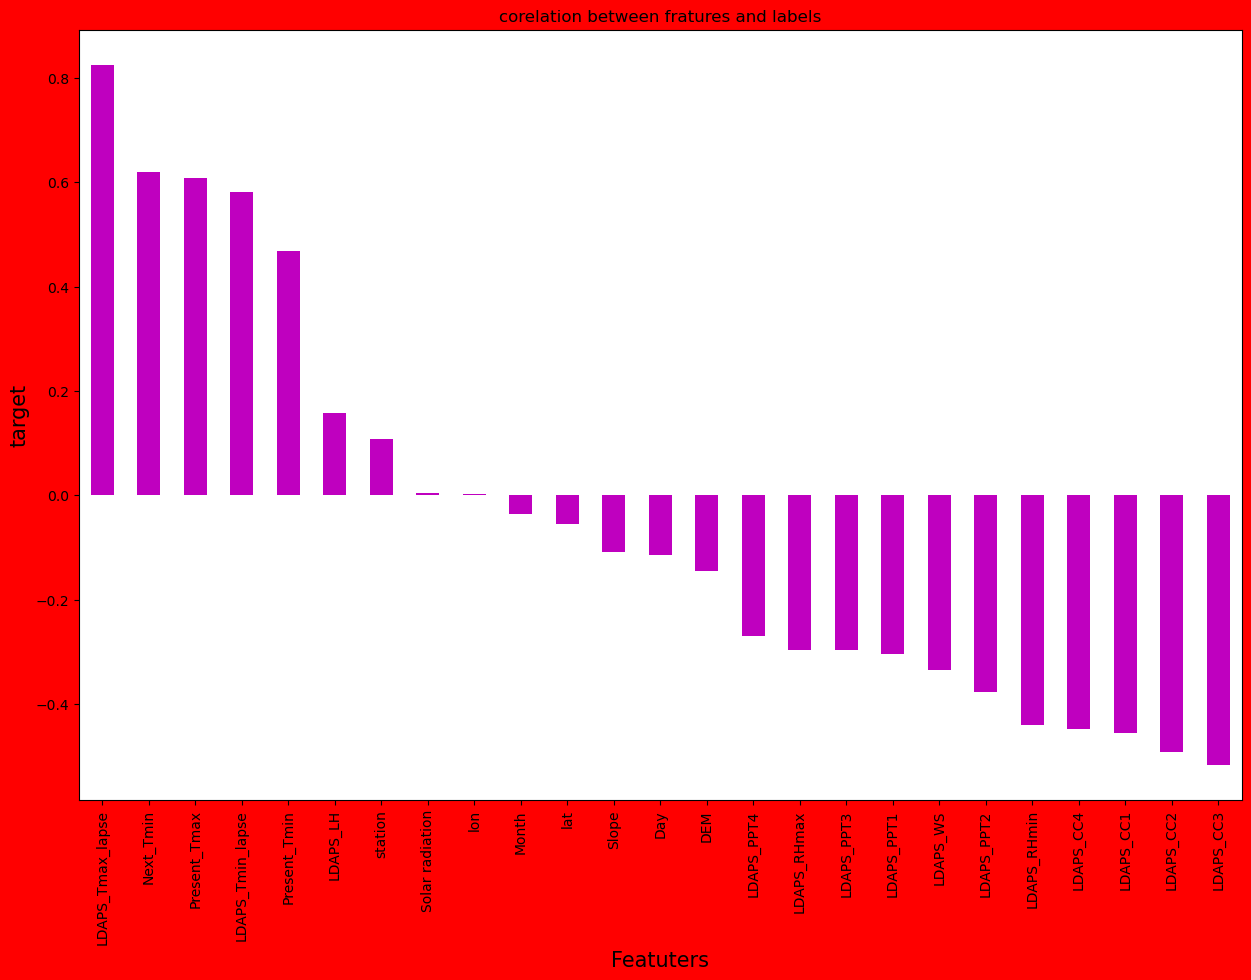

In [122]:
#visualise relation between features and target
plt.figure(figsize=(15,10),facecolor='red')
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='m')
plt.xlabel('Featuters',fontsize=15)
plt.ylabel('target',fontsize=15)
plt.title('corelation between fratures and labels')
plt.show()

In [ ]:
# from above plot we can see some features not contributing much to the target like slope,latitude,longitude,month and solar radiation

In [123]:
x=df.drop('Next_Tmax',axis=1)
y=df['Next_Tmax']

In [124]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin,Month,Day
0,-1.664101,-0.362539,-0.775888,0.102642,0.384032,-0.532361,-0.231727,-0.097978,0.213108,-0.516303,...,-0.599814,-0.580393,1.189704,-0.005038,1.861259,1.364823,1.518401,-0.715567,-1.150892,1.653848
1,-1.525426,0.722161,-0.691370,-0.308235,0.310872,0.079108,0.220927,-0.697587,-0.314969,-0.548628,...,-0.599814,-0.580393,1.189704,0.511327,-0.206066,-0.567919,1.230307,-0.182726,-1.150892,1.653848
2,-1.386750,0.620471,0.027026,-0.553221,-0.637316,0.161919,0.454558,-0.460119,-1.260638,-0.610542,...,-0.599814,-0.580393,0.653264,0.838778,-0.589472,-0.778990,1.216887,0.391104,-1.150892,1.653848
3,-1.248075,0.756058,0.069285,0.101552,1.151508,0.028837,-0.091167,-0.719847,0.100805,-0.583622,...,-0.599814,-0.580393,1.992377,0.385384,-0.174150,1.151880,1.201522,0.555055,-1.150892,1.653848
4,-1.109400,0.552677,-0.564594,-0.040088,0.246585,-0.174470,-0.020587,-0.674648,1.374337,-0.832455,...,-0.599814,-0.580393,0.118811,1.808536,-0.531531,-0.575239,1.207554,-0.182726,-1.150892,1.653848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,1.109400,-2.260764,-2.297198,-2.198945,-1.454106,-0.622332,-2.302834,-0.212704,-1.591063,-1.209752,...,-0.599814,-0.580393,0.118811,0.612081,-0.824048,-0.518556,-2.064311,-2.150139,0.568513,1.653848
7746,1.248075,-2.464146,-2.466232,-1.828278,-0.677864,-1.003614,-2.518127,-0.657049,0.595872,-1.157818,...,-0.599814,-0.580393,-0.685848,1.191417,-0.969009,-0.892100,-2.097462,-2.396066,0.568513,1.653848
7747,1.386750,-2.192971,-2.593008,-2.058222,-1.367100,-1.125049,-2.094723,-0.454429,0.291696,-1.297343,...,-0.599814,-0.580393,-0.149408,-1.264464,-1.182513,-0.873206,-2.093941,-1.986188,0.568513,1.653848
7748,1.525426,-2.192971,-2.339457,-2.243401,-1.592293,-0.898539,-2.113285,-0.244857,-0.456558,-1.274975,...,-0.599814,-0.580393,-0.417628,-1.037767,-1.125349,-0.816268,-2.105458,-1.699274,0.568513,1.653848


In [125]:
# checking multicolinearity between features using vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

In [126]:
vif

,vif values,features
0,1.166200,station
1,2.883402,Present_Tmax
2,3.468026,Present_Tmin
3,6.490179,LDAPS_RHmin
4,2.276626,LDAPS_RHmax
5,7.312021,LDAPS_Tmax_lapse
6,8.888262,LDAPS_Tmin_lapse
7,1.250256,LDAPS_WS
8,1.512040,LDAPS_LH
9,5.254573,LDAPS_CC1


In [ ]:
# we didint find any significantly high multicolinearity between features above 10 so we are  not deleting any features 

In [127]:
# model building 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [128]:
# create train test split
#find best random state
maxACC=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxRS=i
print('maximum r2 scoe is ',maxACC,'on random state ',maxRS)


maximum r2 scoe is  0.8146542182247328 on random state  36


In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=maxRS)

In [130]:
LR=LinearRegression()
LR.fit(x_train,y_train)
LR_pred=LR.predict(x_test)
LR_pred_train=LR.predict(x_train)
print('R2score ',r2_score(y_test,LR_pred)*100)
print('R2 score on train data',r2_score(y_train,LR_pred_train))
print('Mean Absolute error',mean_absolute_error(y_test,LR_pred))
print('Mean Squared error',mean_squared_error(y_test,LR_pred))
print('Root mean squared error',np.sqrt(mean_absolute_error(y_test,LR_pred)))


R2score  81.46542182247329
R2 score on train data 0.7816901487629584
Mean Absolute error 1.0339929049718524
Mean Squared error 1.8250540812851854
Root mean squared error 1.016854416803041


In [132]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
GBR_pred=GBR.predict(x_test)
GBR_pred_train=GBR.predict(x_train)
print('R2score ',r2_score(y_test,GBR_pred)*100)
print('R2 score on train data',r2_score(y_train,GBR_pred_train))
print('Mean Absolute error',mean_absolute_error(y_test,GBR_pred))
print('Mean Squared error',mean_squared_error(y_test,GBR_pred))
print('Root mean squared error',np.sqrt(mean_absolute_error(y_test,GBR_pred)))

R2score  87.28758285565294
R2 score on train data 0.8694164401751769
Mean Absolute error 0.8578286447960224
Mean Squared error 1.251760281246731
Root mean squared error 0.9261903933835756


In [133]:
ABR=AdaBoostRegressor()
ABR.fit(x_train,y_train)
ABR_pred=ABR.predict(x_test)
ABR_pred_train=ABR.predict(x_train)
print('R2score ',r2_score(y_test,ABR_pred)*100)
print('R2 score on train data',r2_score(y_train,ABR_pred_train))
print('Mean Absolute error',mean_absolute_error(y_test,ABR_pred))
print('Mean Squared error',mean_squared_error(y_test,ABR_pred))
print('Root mean squared error',np.sqrt(mean_absolute_error(y_test,ABR_pred)))

R2score  77.46951269395575
R2 score on train data 0.7607716784510122
Mean Absolute error 1.2216328897479973
Mean Squared error 2.218521372183026
Root mean squared error 1.1052750290077114


In [134]:
from sklearn.linear_model import Ridge,Lasso
RIDGE=Ridge()
RIDGE.fit(x_train,y_train)
RIDGE_pred=RIDGE.predict(x_test)
RIDGE_pred_train=RIDGE.predict(x_train)
print('R2score ',r2_score(y_test,RIDGE_pred)*100)
print('R2 score on train data',r2_score(y_train,RIDGE_pred_train))
print('Mean Absolute error',mean_absolute_error(y_test,RIDGE_pred))
print('Mean Squared error',mean_squared_error(y_test,RIDGE_pred))
print('Root mean squared error',np.sqrt(mean_absolute_error(y_test,RIDGE_pred)))

R2score  81.46477403669226
R2 score on train data 0.7816900152520387
Mean Absolute error 1.0340205255707173
Mean Squared error 1.8251178671492145
Root mean squared error 1.0168679981053181


In [136]:
LASSO=Lasso()
LASSO.fit(x_train,y_train)
LASSO_pred=LASSO.predict(x_test)
LASSO_pred_train=LASSO.predict(x_train)
print('R2score ',r2_score(y_test,LASSO_pred)*100)
print('R2 score on train data',r2_score(y_train,LASSO_pred_train))
print('Mean Absolute error',mean_absolute_error(y_test,LASSO_pred))
print('Mean Squared error',mean_squared_error(y_test,LASSO_pred))
print('Root mean squared error',np.sqrt(mean_absolute_error(y_test,LASSO_pred)))

R2score  59.77886116071369
R2 score on train data 0.567831628063504
Mean Absolute error 1.598409627538632
Mean Squared error 3.960476083646861
Root mean squared error 1.2642822578596253


In [137]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)
DT_pred=DT.predict(x_test)
DT_pred_train=DT.predict(x_train)
print('R2score ',r2_score(y_test,DT_pred)*100)
print('R2 score on train data',r2_score(y_train,DT_pred_train))
print('Mean Absolute error',mean_absolute_error(y_test,DT_pred))
print('Mean Squared error',mean_squared_error(y_test,DT_pred))
print('Root mean squared error',np.sqrt(mean_absolute_error(y_test,DT_pred)))

R2score  82.06973087735025
R2 score on train data 1.0
Mean Absolute error 0.957918509019978
Mean Squared error 1.7655492629722405
Root mean squared error 0.9787331142962202


In [138]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
KNN_pred=KNN.predict(x_test)
KNN_pred_train=KNN.predict(x_train)
print('R2score ',r2_score(y_test,KNN_pred)*100)
print('R2 score on train data',r2_score(y_train,KNN_pred_train))
print('Mean Absolute error',mean_absolute_error(y_test,KNN_pred))
print('Mean Squared error',mean_squared_error(y_test,KNN_pred))
print('Root mean squared error',np.sqrt(mean_absolute_error(y_test,KNN_pred)))

R2score  88.26974831795762
R2 score on train data 0.924000575858998
Mean Absolute error 0.8168178887529082
Mean Squared error 1.1550488768485485
Root mean squared error 0.9037797789024206


In [139]:
from sklearn.svm import SVR
SVM=SVR()
SVM.fit(x_train,y_train)
SVM_pred=SVM.predict(x_test)
SVM_pred_train=SVM.predict(x_train)
print('R2score ',r2_score(y_test,SVM_pred)*100)
print('R2 score on train data',r2_score(y_train,SVM_pred_train))
print('Mean Absolute error',mean_absolute_error(y_test,SVM_pred))
print('Mean Squared error',mean_squared_error(y_test,SVM_pred))
print('Root mean squared error',np.sqrt(mean_absolute_error(y_test,SVM_pred)))

R2score  91.11949038318478
R2 score on train data 0.9133509286437911
Mean Absolute error 0.7026143909161015
Mean Squared error 0.8744418224587662
Root mean squared error 0.8382209678337219


In [140]:
from sklearn.ensemble import ExtraTreesRegressor
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
ETR_pred=ETR.predict(x_test)
ETR_pred_train=ETR.predict(x_train)
print('R2score ',r2_score(y_test,ETR_pred)*100)
print('R2 score on train data',r2_score(y_train,ETR_pred_train))
print('Mean Absolute error',mean_absolute_error(y_test,ETR_pred))
print('Mean Squared error',mean_squared_error(y_test,ETR_pred))
print('Root mean squared error',np.sqrt(mean_absolute_error(y_test,ETR_pred)))

R2score  93.59892211909218
R2 score on train data 1.0
Mean Absolute error 0.5993958678935558
Mean Squared error 0.6302983105026917
Root mean squared error 0.774206605431364


In [141]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
RFR_pred=RFR.predict(x_test)
RFR_pred_train=RFR.predict(x_train)
print('R2score ',r2_score(y_test,RFR_pred)*100)
print('R2 score on train data',r2_score(y_train,RFR_pred_train))
print('Mean Absolute error',mean_absolute_error(y_test,RFR_pred))
print('Mean Squared error',mean_squared_error(y_test,RFR_pred))
print('Root mean squared error',np.sqrt(mean_absolute_error(y_test,RFR_pred)))

R2score  91.85050843824996
R2 score on train data 0.9869020248050325
Mean Absolute error 0.6652035285469041
Mean Squared error 0.8024602822202336
Root mean squared error 0.8156001033269332


In [143]:
from sklearn.model_selection import cross_val_score

In [145]:
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('R2 score ',r2_score(y_test,LR_pred))
print('Deferenc between R2 score and cross val score ',(r2_score(y_test,LR_pred)-score.mean()))

[0.70307929 0.65155262 0.69825075 0.83150018 0.70390769]
0.717658106008459
R2 score  0.8146542182247328
Deferenc between R2 score and cross val score  0.0969961122162738


In [146]:
score1=cross_val_score(GBR,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('R2 score ',r2_score(y_test,GBR_pred))
print('Deferenc between R2 score and cross val score ',(r2_score(y_test,GBR_pred)-score1.mean()))

[0.70759522 0.67404016 0.67036311 0.82766204 0.67943771]
0.7118196470353819
R2 score  0.8728758285565295
Deferenc between R2 score and cross val score  0.16105618152114753


In [148]:
score2=cross_val_score(ABR,x,y,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print('R2 score ',r2_score(y_test,ABR_pred))
print('Deferenc between R2 score and cross val score ',(r2_score(y_test,ABR_pred)-score2.mean()))

[0.64522152 0.61554428 0.63467378 0.76966755 0.63669437]
0.6603602996808018
R2 score  0.7746951269395574
Deferenc between R2 score and cross val score  0.11433482725875566


In [149]:
score3=cross_val_score(RIDGE,x,y)
print(score3)
print(score3.mean())
print('R2 score ',r2_score(y_test,RIDGE_pred))
print('Deferenc between R2 score and cross val score ',(r2_score(y_test,RIDGE_pred)-score3.mean()))

[0.70321498 0.65152889 0.69821519 0.8315344  0.70394601]
0.7176878928654902
R2 score  0.8146477403669226
Deferenc between R2 score and cross val score  0.09695984750143238


In [150]:
score4=cross_val_score(LASSO,x,y)
print(score4)
print(score4.mean())
print('R2 score ',r2_score(y_test,LASSO_pred))
print('Deferenc between R2 score and cross val score ',(r2_score(y_test,LASSO_pred)-score4.mean()))

[0.50396129 0.52751791 0.57042485 0.50018571 0.58460653]
0.5373392591749505
R2 score  0.5977886116071369
Deferenc between R2 score and cross val score  0.06044935243218641


In [151]:
score5=cross_val_score(DT,x,y)
print(score5)
print(score5.mean())
print('R2 score ',r2_score(y_test,DT_pred))
print('Deferenc between R2 score and cross val score ',(r2_score(y_test,DT_pred)-score5.mean()))

[0.39041552 0.41689481 0.28807026 0.69920815 0.43502137]
0.4459220228941091
R2 score  0.8206973087735026
Deferenc between R2 score and cross val score  0.37477528587939346


In [152]:
score6=cross_val_score(KNN,x,y)
print(score6)
print(score6.mean())
print('R2 score ',r2_score(y_test,KNN_pred))
print('Deferenc between R2 score and cross val score ',(r2_score(y_test,KNN_pred)-score6.mean()))

[0.56555501 0.41629665 0.47333557 0.73068206 0.62994602]
0.5631630616105069
R2 score  0.8826974831795762
Deferenc between R2 score and cross val score  0.3195344215690693


In [153]:
score7=cross_val_score(ETR,x,y)
print(score7)
print(score7.mean())
print('R2 score ',r2_score(y_test,ETR_pred))
print('Deferenc between R2 score and cross val score ',(r2_score(y_test,ETR_pred)-score7.mean()))

[0.68892003 0.64128225 0.68286589 0.83927737 0.68478302]
0.70742571374769
R2 score  0.9359892211909218
Deferenc between R2 score and cross val score  0.22856350744323173


In [154]:
score8=cross_val_score(RFR,x,y)
print(score8)
print(score8.mean())
print('R2 score ',r2_score(y_test,RFR_pred))
print('Deferenc between R2 score and cross val score ',(r2_score(y_test,RFR_pred)-score8.mean()))

[0.68406494 0.65810329 0.65337947 0.82326703 0.66683634]
0.6971302152261514
R2 score  0.9185050843824997
Deferenc between R2 score and cross val score  0.2213748691563483


In [156]:
score9=cross_val_score(SVM,x,y)
print(score9)
print(score9.mean())
print('R2 score ',r2_score(y_test,SVM_pred))
print('Deferenc between R2 score and cross val score ',(r2_score(y_test,SVM_pred)-score9.mean()))

[0.70508065 0.58154982 0.65917248 0.83063924 0.68942768]
0.6931739742079193
R2 score  0.9111949038318479
Deferenc between R2 score and cross val score  0.2180209296239286


In [ ]:
# Deference between R2 score and cross val score less in Ridge regression model building 
# do hyperparameter tuning for ridge regressor

In [157]:
from sklearn.model_selection import GridSearchCV


In [159]:
param={'alpha':[1,0.5,0.4,2],'fit_intercept':[True,False],'solver':['auto','svd','cholesky','lsqr','sag','saga','lbfgs'],'positive':[True,False],'random_state':[1,4,10,20]}

In [160]:
gscv=GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 0.5, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [True, False],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [161]:
gscv.best_params_

{'alpha': 2,
 'fit_intercept': True,
 'positive': False,
 'random_state': 10,
 'solver': 'sag'}

In [162]:
model=Ridge(alpha=2,fit_intercept=True,positive=False,random_state=10,solver='sag')

In [163]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('R2score ',r2_score(y_test,pred)*100)
print('Mean Absolute error',mean_absolute_error(y_test,pred))
print('Mean Squared error',mean_squared_error(y_test,pred))
print('Root mean squared error',np.sqrt(mean_absolute_error(y_test,pred)))

R2score  81.46400082711071
Mean Absolute error 1.0340533646605112
Mean Squared error 1.8251940031847358
Root mean squared error 1.016884145151507


In [ ]:
# after hyper parameter tuning getting the same score 

In [164]:
# first we predict and check accuracy score using target variable as next_Tmax
# next we will predict and check accuracy score using target variable as next_Tmin
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,37.6046,126.991,106.5310,2.7850,5992.895996,29.1,21.2,6.0,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6.0,30
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6.0,30
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6.0,30
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6.0,30


In [166]:
x1=df.drop('Next_Tmin',axis=1)
y1=df['Next_Tmin']

In [167]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)
x1

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Month,Day
0,-1.664101,-0.362539,-0.775888,0.102642,0.384032,-0.532361,-0.231727,-0.097978,0.213108,-0.516303,...,-0.599814,-0.580393,1.189704,-0.005038,1.861259,1.364823,1.518401,-0.380213,-1.150892,1.653848
1,-1.525426,0.722161,-0.691370,-0.308235,0.310872,0.079108,0.220927,-0.697587,-0.314969,-0.548628,...,-0.599814,-0.580393,1.189704,0.511327,-0.206066,-0.567919,1.230307,0.070871,-1.150892,1.653848
2,-1.386750,0.620471,0.027026,-0.553221,-0.637316,0.161919,0.454558,-0.460119,-1.260638,-0.610542,...,-0.599814,-0.580393,0.653264,0.838778,-0.589472,-0.778990,1.216887,0.264192,-1.150892,1.653848
3,-1.248075,0.756058,0.069285,0.101552,1.151508,0.028837,-0.091167,-0.719847,0.100805,-0.583622,...,-0.599814,-0.580393,1.992377,0.385384,-0.174150,1.151880,1.201522,0.457514,-1.150892,1.653848
4,-1.109400,0.552677,-0.564594,-0.040088,0.246585,-0.174470,-0.020587,-0.674648,1.374337,-0.832455,...,-0.599814,-0.580393,0.118811,1.808536,-0.531531,-0.575239,1.207554,0.296412,-1.150892,1.653848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,1.109400,-2.260764,-2.297198,-2.198945,-1.454106,-0.622332,-2.302834,-0.212704,-1.591063,-1.209752,...,-0.599814,-0.580393,0.118811,0.612081,-0.824048,-0.518556,-2.064311,-0.863517,0.568513,1.653848
7746,1.248075,-2.464146,-2.466232,-1.828278,-0.677864,-1.003614,-2.518127,-0.657049,0.595872,-1.157818,...,-0.599814,-0.580393,-0.685848,1.191417,-0.969009,-0.892100,-2.097462,-0.734636,0.568513,1.653848
7747,1.386750,-2.192971,-2.593008,-2.058222,-1.367100,-1.125049,-2.094723,-0.454429,0.291696,-1.297343,...,-0.599814,-0.580393,-0.149408,-1.264464,-1.182513,-0.873206,-2.093941,-0.637975,0.568513,1.653848
7748,1.525426,-2.192971,-2.339457,-2.243401,-1.592293,-0.898539,-2.113285,-0.244857,-0.456558,-1.274975,...,-0.599814,-0.580393,-0.417628,-1.037767,-1.125349,-0.816268,-2.105458,-0.541314,0.568513,1.653848


In [168]:
# checking multicolinearity between features using vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['features']=x1.columns

In [169]:
vif

,vif values,features
0,1.176640,station
1,2.958205,Present_Tmax
2,3.130455,Present_Tmin
3,6.474923,LDAPS_RHmin
4,2.275336,LDAPS_RHmax
5,8.731251,LDAPS_Tmax_lapse
6,7.064952,LDAPS_Tmin_lapse
7,1.292095,LDAPS_WS
8,1.533581,LDAPS_LH
9,5.288062,LDAPS_CC1


In [ ]:
# we didint find any significantly high multicolinearity between features above 10 so we are  not deleting any features 

In [170]:
# model building 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [171]:
# create train test split
#find best random state
maxACC=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxRS=i
print('maximum r2 scoe is ',maxACC,'on random state ',maxRS)

maximum r2 scoe is  0.8711792565135383 on random state  36


In [172]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=maxRS)

In [173]:
LR=LinearRegression()
LR.fit(x_train,y_train)
LR_pred=LR.predict(x_test)
LR_pred_train=LR.predict(x_train)
print('R2score ',r2_score(y_test,LR_pred)*100)
print('R2 score on train data',r2_score(y_train,LR_pred_train))
print('Mean Absolute error',mean_absolute_error(y_test,LR_pred))
print('Mean Squared error',mean_squared_error(y_test,LR_pred))
print('Root mean squared error',np.sqrt(mean_absolute_error(y_test,LR_pred)))


R2score  87.11792565135383
R2 score on train data 0.8435610282759267
Mean Absolute error 0.7174942197877058
Mean Squared error 0.829156010790773
Root mean squared error 0.8470503053465631


In [174]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
GBR_pred=GBR.predict(x_test)
GBR_pred_train=GBR.predict(x_train)
print('R2score ',r2_score(y_test,GBR_pred)*100)
print('R2 score on train data',r2_score(y_train,GBR_pred_train))
print('Mean Absolute error',mean_absolute_error(y_test,GBR_pred))
print('Mean Squared error',mean_squared_error(y_test,GBR_pred))
print('Root mean squared error',np.sqrt(mean_absolute_error(y_test,GBR_pred)))

R2score  90.81492402981867
R2 score on train data 0.9065410617709612
Mean Absolute error 0.6101473982800356
Mean Squared error 0.5911983384140398
Root mean squared error 0.7811193239704389


In [175]:
ABR=AdaBoostRegressor()
ABR.fit(x_train,y_train)
ABR_pred=ABR.predict(x_test)
ABR_pred_train=ABR.predict(x_train)
print('R2score ',r2_score(y_test,ABR_pred)*100)
print('R2 score on train data',r2_score(y_train,ABR_pred_train))
print('Mean Absolute error',mean_absolute_error(y_test,ABR_pred))
print('Mean Squared error',mean_squared_error(y_test,ABR_pred))
print('Root mean squared error',np.sqrt(mean_absolute_error(y_test,ABR_pred)))

R2score  82.90593097016118
R2 score on train data 0.8161348101849373
Mean Absolute error 0.853100818324787
Mean Squared error 1.1002614719773622
Root mean squared error 0.9236345696891098


In [176]:
from sklearn.linear_model import Ridge,Lasso
RIDGE=Ridge()
RIDGE.fit(x_train,y_train)
RIDGE_pred=RIDGE.predict(x_test)
RIDGE_pred_train=RIDGE.predict(x_train)
print('R2score ',r2_score(y_test,RIDGE_pred)*100)
print('R2 score on train data',r2_score(y_train,RIDGE_pred_train))
print('Mean Absolute error',mean_absolute_error(y_test,RIDGE_pred))
print('Mean Squared error',mean_squared_error(y_test,RIDGE_pred))
print('Root mean squared error',np.sqrt(mean_absolute_error(y_test,RIDGE_pred)))

R2score  87.11845577444667
R2 score on train data 0.8435609650737317
Mean Absolute error 0.7174866146792631
Mean Squared error 0.8291218893645955
Root mean squared error 0.847045816163012


In [177]:
LASSO=Lasso()
LASSO.fit(x_train,y_train)
LASSO_pred=LASSO.predict(x_test)
LASSO_pred_train=LASSO.predict(x_train)
print('R2score ',r2_score(y_test,LASSO_pred)*100)
print('R2 score on train data',r2_score(y_train,LASSO_pred_train))
print('Mean Absolute error',mean_absolute_error(y_test,LASSO_pred))
print('Mean Squared error',mean_squared_error(y_test,LASSO_pred))
print('Root mean squared error',np.sqrt(mean_absolute_error(y_test,LASSO_pred)))

R2score  61.282585097850514
R2 score on train data 0.6055084150351722
Mean Absolute error 1.269231440899263
Mean Squared error 2.4920503033559425
Root mean squared error 1.1266017223931726


In [178]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)
DT_pred=DT.predict(x_test)
DT_pred_train=DT.predict(x_train)
print('R2score ',r2_score(y_test,DT_pred)*100)
print('R2 score on train data',r2_score(y_train,DT_pred_train))
print('Mean Absolute error',mean_absolute_error(y_test,DT_pred))
print('Mean Squared error',mean_squared_error(y_test,DT_pred))
print('Root mean squared error',np.sqrt(mean_absolute_error(y_test,DT_pred)))

R2score  81.03130685743356
R2 score on train data 1.0
Mean Absolute error 0.8039142987222916
Mean Squared error 1.220921841493455
Root mean squared error 0.8966126804380427


In [179]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
KNN_pred=KNN.predict(x_test)
KNN_pred_train=KNN.predict(x_train)
print('R2score ',r2_score(y_test,KNN_pred)*100)
print('R2 score on train data',r2_score(y_train,KNN_pred_train))
print('Mean Absolute error',mean_absolute_error(y_test,KNN_pred))
print('Mean Squared error',mean_squared_error(y_test,KNN_pred))
print('Root mean squared error',np.sqrt(mean_absolute_error(y_test,KNN_pred)))

R2score  88.09190722892353
R2 score on train data 0.9213940563418548
Mean Absolute error 0.6776433309803562
Mean Squared error 0.7664655886130542
Root mean squared error 0.8231909444231977


In [180]:
from sklearn.svm import SVR
SVM=SVR()
SVM.fit(x_train,y_train)
SVM_pred=SVM.predict(x_test)
SVM_pred_train=SVM.predict(x_train)
print('R2score ',r2_score(y_test,SVM_pred)*100)
print('R2 score on train data',r2_score(y_train,SVM_pred_train))
print('Mean Absolute error',mean_absolute_error(y_test,SVM_pred))
print('Mean Squared error',mean_squared_error(y_test,SVM_pred))
print('Root mean squared error',np.sqrt(mean_absolute_error(y_test,SVM_pred)))

R2score  93.72615284580654
R2 score on train data 0.9420704223227296
Mean Absolute error 0.49134548363858754
Mean Squared error 0.40381680293816874
Root mean squared error 0.7009604009062049


In [181]:
from sklearn.ensemble import ExtraTreesRegressor
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
ETR_pred=ETR.predict(x_test)
ETR_pred_train=ETR.predict(x_train)
print('R2score ',r2_score(y_test,ETR_pred)*100)
print('R2 score on train data',r2_score(y_train,ETR_pred_train))
print('Mean Absolute error',mean_absolute_error(y_test,ETR_pred))
print('Mean Squared error',mean_squared_error(y_test,ETR_pred))
print('Root mean squared error',np.sqrt(mean_absolute_error(y_test,ETR_pred)))

R2score  93.23811411794959
R2 score on train data 1.0
Mean Absolute error 0.5013472570829481
Mean Squared error 0.4352294647307785
Root mean squared error 0.7080587949336892


In [182]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
RFR_pred=RFR.predict(x_test)
RFR_pred_train=RFR.predict(x_train)
print('R2score ',r2_score(y_test,RFR_pred)*100)
print('R2 score on train data',r2_score(y_train,RFR_pred_train))
print('Mean Absolute error',mean_absolute_error(y_test,RFR_pred))
print('Mean Squared error',mean_squared_error(y_test,RFR_pred))
print('Root mean squared error',np.sqrt(mean_absolute_error(y_test,RFR_pred)))

R2score  92.23052344818989
R2 score on train data 0.9871658575259789
Mean Absolute error 0.5422817110181986
Mean Squared error 0.5000831395068261
Root mean squared error 0.7363977940068795


In [183]:
from sklearn.model_selection import cross_val_score

In [184]:
score=cross_val_score(LR,x1,y1,cv=5,scoring='r2')
print(score)
print(score.mean())
print('R2 score ',r2_score(y_test,LR_pred))
print('Deferenc between R2 score and cross val score ',(r2_score(y_test,LR_pred)-score.mean()))

[0.71054555 0.66261527 0.81900723 0.87300488 0.8766842 ]
0.788371425047047
R2 score  0.8711792565135383
Deferenc between R2 score and cross val score  0.08280783146649129


In [185]:
score1=cross_val_score(GBR,x1,y1,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('R2 score ',r2_score(y_test,GBR_pred))
print('Deferenc between R2 score and cross val score ',(r2_score(y_test,GBR_pred)-score1.mean()))

[0.70002448 0.6750424  0.83311463 0.88222596 0.88838983]
0.795759460827124
R2 score  0.9081492402981867
Deferenc between R2 score and cross val score  0.11238977947106266


In [186]:
score2=cross_val_score(ABR,x,y,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print('R2 score ',r2_score(y_test,ABR_pred))
print('Deferenc between R2 score and cross val score ',(r2_score(y_test,ABR_pred)-score2.mean()))

[0.64609351 0.61530291 0.63287563 0.7668061  0.65008034]
0.6622316953013355
R2 score  0.8290593097016118
Deferenc between R2 score and cross val score  0.16682761440027627


In [188]:
score3=cross_val_score(RIDGE,x1,y1)
print(score3)
print(score3.mean())
print('R2 score ',r2_score(y_test,RIDGE_pred))
print('Deferenc between R2 score and cross val score ',(r2_score(y_test,RIDGE_pred)-score3.mean()))

[0.71058102 0.66269582 0.81897938 0.87301285 0.87669606]
0.7883930265716426
R2 score  0.8711845577444668
Deferenc between R2 score and cross val score  0.08279153117282423


In [189]:
score4=cross_val_score(LASSO,x1,y1)
print(score4)
print(score4.mean())
print('R2 score ',r2_score(y_test,LASSO_pred))
print('Deferenc between R2 score and cross val score ',(r2_score(y_test,LASSO_pred)-score4.mean()))

[0.54668724 0.43084419 0.59653307 0.51279738 0.64857603]
0.5470875839874433
R2 score  0.6128258509785052
Deferenc between R2 score and cross val score  0.06573826699106189


In [190]:
score5=cross_val_score(DT,x1,y1)
print(score5)
print(score5.mean())
print('R2 score ',r2_score(y_test,DT_pred))
print('Deferenc between R2 score and cross val score ',(r2_score(y_test,DT_pred)-score5.mean()))

[0.33410296 0.4361363  0.63780441 0.77929414 0.70180771]
0.5778291023643176
R2 score  0.8103130685743356
Deferenc between R2 score and cross val score  0.232483966210018


In [191]:
score6=cross_val_score(KNN,x1,y1)
print(score6)
print(score6.mean())
print('R2 score ',r2_score(y_test,KNN_pred))
print('Deferenc between R2 score and cross val score ',(r2_score(y_test,KNN_pred)-score6.mean()))

[0.50185909 0.38359086 0.597288   0.71941737 0.76932798]
0.5942966617480829
R2 score  0.8809190722892353
Deferenc between R2 score and cross val score  0.28662241054115234


In [192]:
score7=cross_val_score(ETR,x1,y1)
print(score7)
print(score7.mean())
print('R2 score ',r2_score(y_test,ETR_pred))
print('Deferenc between R2 score and cross val score ',(r2_score(y_test,ETR_pred)-score7.mean()))

[0.70260625 0.67989713 0.82132933 0.87439015 0.88528426]
0.7927014245013035
R2 score  0.9323811411794959
Deferenc between R2 score and cross val score  0.13967971667819234


In [193]:
score8=cross_val_score(RFR,x1,y1)
print(score8)
print(score8.mean())
print('R2 score ',r2_score(y_test,RFR_pred))
print('Deferenc between R2 score and cross val score ',(r2_score(y_test,RFR_pred)-score8.mean()))

[0.68856748 0.67830737 0.8104839  0.87751252 0.8757203 ]
0.7861183134248566
R2 score  0.9223052344818988
Deferenc between R2 score and cross val score  0.13618692105704222


In [194]:
score9=cross_val_score(SVM,x,y)
print(score9)
print(score9.mean())
print('R2 score ',r2_score(y_test,SVM_pred))
print('Deferenc between R2 score and cross val score ',(r2_score(y_test,SVM_pred)-score9.mean()))

[0.70508065 0.58154982 0.65917248 0.83063924 0.68942768]
0.6931739742079193
R2 score  0.9372615284580654
Deferenc between R2 score and cross val score  0.24408755425014617


In [ ]:
# the deference between r2 score and cross val score is less for Ridge regression model.so ridge will be the best performing model 